### Notes and References
None yet.




## Setup

### Imports for hosted runtime

In [ ]:
%matplotlib inline
#@markdown ###First Cell 
#@markdown *Please paste this cell into any colab notebook for this project.* <br>
#@markdown ***
#@markdown **Contents**: Contents. <br>
#@markdown ***
#@markdown Major Edit History: 
#@markdown - John McCloskey, 6/15: Created as copy of Old Notebook (`Multinomial Regression`).
#@markdown - John McCloskey, 6/15: Change from multinomial based workflow to an assortment of different classifiers
#@markdown - John McCloskey, 6/23: Clean up code. Rename from `Classifiers` to `Grid Searches`.
#@markdown ***
#@markdown <br> 
#@markdown Please change `FIELDDAY_DIR` if it is located differently in your drive. This cell will error if `FIELDDAY_DIR` is incorrect.
# mount drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Change working directory
import os
FIELDDAY_DIR = '/content/drive/My Drive/Field Day' #@param {type:"string"}
INCLUDE_DIR = '/content/drive/My Drive/Field Day/Research and Writing Projects/OGDUtils' #@param (type:"string")
PROJECT_DIR = os.path.join(FIELDDAY_DIR,'Research and Writing Projects/2019 Using Jo Wilder to Predict English Language Skill')
JUPYTER_DIR = os.path.join(PROJECT_DIR,'Colab')
os.chdir(JUPYTER_DIR)
print(f'---\nCWD: {os.getcwd()}')

#@markdown Change pandas `max_rows` and `max_columns`
import pandas as pd
pd.options.display.max_columns = 100 #@param {type:"integer"}
#pd.options.display.max_columns = 1000
pd.options.display.max_rows = 60 #@param {type:"integer"}

#@markdown *Note: There may be other variables to manually change. Look the "Set Variables" section.*

# import utils
import sys
sys.path.append(INCLUDE_DIR)
#sys.path.append('.')
import utils


Bad key "text.kerning_factor" on line 4 in
C:\Users\johnm\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


ModuleNotFoundError: ignored

In [ ]:
# jupyter-specific libraries
import ipywidgets as widgets
from google.colab import files
# standard libraries
import numpy as np
import pandas as pd
from math import ceil
from matplotlib import pyplot as plt
from scipy import stats
from collections import Counter
from io import BytesIO
from zipfile import ZipFile
import importlib
import urllib.request
# custom libraries
import jowilder_utils as jw_util
import feature_utils as feat_util
# machine learning libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline as sklearn_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, plot_confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, RepeatedEditedNearestNeighbours
from imblearn.combine import SMOTEENN, SMOTETomek
from xgboost import XGBClassifier
import copy

importlib.reload(feat_util)
importlib.reload(jw_util)

ModuleNotFoundError: ignored

#### Set csv_path to use (optional)

In [ ]:
csv_reldir = "Output Data" #@param {type:"string"}
csv_fname = "JM_202006101052_with_nans.csv" #@param {type:"string"}
csv_path = os.path.join(csv_reldir, csv_fname)
print('Open from:', csv_path)
print('Other files in dir:', ''.join([
        f'\n{f}' for f in os.listdir(csv_reldir) if f.endswith('sv')]))

Open from: Output Data/JM_202006101052_with_nans.csv
Other files in dir: 
JM_202006041215_filtered_obj_feats.csv
JM_202006080931_filtered_obj_feats.csv
JM_202006090933_filtered_obj_feats.csv
JM_202006101044_filtered_obj_feats.csv
JM_202006101052_with_nans.csv
JM_202006101204_throughAss2_wNaN.csv
JM_202006101204_all_wNaN.csv
JM_202006101204_all_woutNaN.csv
JM_202006101204_all_woutNaN_selected_for_R0_SVM_with_oversampling.csv
JM_202006101204_all_woutNaN_selected_for_R1_SVM_with_oversampling.csv
JM_202006101204_all_woutNaN_selected_for_R2_SVM_with_oversampling.csv
JM_202006101204_all_woutNaN_selected_for_R0_SVM.csv
JM_202006101204_all_woutNaN_selected_for_R1_SVM.csv
JM_202006101204_all_woutNaN_selected_for_R2_SVM.csv
JM_202006101204_all_woutNaN_selected_for_R0_Lasso.csv
JM_202006101204_all_woutNaN_selected_for_R1_Lasso.csv
JM_202006101204_all_woutNaN_selected_for_R2_Lasso.csv
JM_202006101204_all_woutNaN_selected_for_R0_Lasso_with_oversampling.csv
JM_202006101204_all_woutNaN_selected_for_R

### Imports for local runtime

Set INCLUDE_DIR for the OGDUtils modules

In [1]:
INCLUDE_DIR = r"C:\Users\johnm\Development\FieldDay\OGDUtils" ## CHANGE THIS

In [2]:
# specific to local john computer
import sys
sys.path.append(INCLUDE_DIR)

# standard libraries
import numpy as np
import pandas as pd
import os

from math import ceil
from matplotlib import pyplot as plt
from scipy import stats
from collections import Counter
from io import BytesIO
from zipfile import ZipFile
import importlib
import urllib.request
# custom libraries
import jowilder_utils as jw_util
import feature_utils as feat_util
# machine learning libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline as sklearn_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, plot_confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, RepeatedEditedNearestNeighbours
from imblearn.combine import SMOTEENN, SMOTETomek
from xgboost import XGBClassifier
import copy

importlib.reload(feat_util)
importlib.reload(jw_util)


Bad key "text.kerning_factor" on line 4 in
C:\Users\johnm\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


<module 'jowilder_utils' from 'C:\\Users\\johnm\\Development\\FieldDay\\OGDUtils\\jowilder_utils.py'>

## Define Main Class

In [3]:
class MainClass():

    def __init__(self, csv_fpath=None, df=None):
        # either give csv_fpath or df.
        assert csv_fpath or df
        # load df
        if df is None:
            self.df, self.meta = feat_util.open_csv_from_path_with_meta(csv_fpath, index_col=0)
        else:
            self.df, self.meta = df, []
    
        # set X and ys, and preprocessor
        self.preprocessor, self.X = jw_util.get_preprocessor(self.df)
        self.X = self.X.fillna(0)
        self.ys = jw_util.get_ys(self.df)

        # set object vars
        self.model_dict = {}
        self.cur_model = None
        self.y = self.ys['y1_bin']
        self.split_data()

    def split_data(self):
        nonnull_X, nonnull_y = feat_util.remove_nan_labels(self.X, self.y)
        X_train, X_test, y_train, y_test = train_test_split(nonnull_X, nonnull_y, test_size=0.2, random_state=1)
        self.X_train, self.X_test, self.y_train, self.y_test = X_train, X_test, y_train, y_test

    def set_y(self, y_key=None, other_col=None):
        if y_key:
            self.y = self.ys[y_key]
        elif other_col:
            self.y = self.X[other_col]
            self.X = self.X.drop(other_col, axis=1)
        else:
            print("Did not change y. Invalid inputs.")
        self.split_data()

    def run_fit(self, classifier, sampler=None, verbose=False):
        # fit self.cur_model as a pipeline of the given preprocessor, sampler, preprocessor, classifer
        clf = make_pipeline(self.preprocessor, sampler, copy.deepcopy(self.preprocessor),classifier)
        self._sampling_pipeline = clf[:2]
        self._classifying_pipeline = clf[2:]
        if sampler is not None:
            self.X_train_sampled, self.y_train_sampled = self._sampling_pipeline.fit_resample(self.X_train, self.y_train)
        else:
            self.X_train_sampled, self.y_train_sampled = self.X_train, self.y_train
            clf = self._classifying_pipeline

        model_name = f'{sampler} {classifier}'
        if verbose:
            print(f'Running {model_name}.')
        self._classifying_pipeline.fit(self.X_train_sampled, self.y_train_sampled)
        self.cur_model = clf
        if verbose:
            print("model trained to: %.3f" % clf.score(self.X_train, self.y_train))
            print("model score: %.3f" % clf.score(self.X_test, self.y_test))
        return clf
    
    def metrics(self):
        # return list of (metric: float, metric_name: str) tuples of metrics of given classifier (default: self.cur_model)
        f1 = lambda pr, re: 2*pr*re/(pr+re)
        metric_list = []
        clf = self.cur_model

        # label metrics
        for yarray, Xarray, label in [(self.y_test, self.X_test, 'test'),
                               (self.y_train_sampled, self.X_train_sampled, 'train'),
                               (self.y_train, self.X_train, 'train_raw'),
                               ]:
            y_pred = clf.predict(Xarray)
            y_prob = clf.predict_proba(Xarray)[:,1]

            auc = roc_auc_score(y_true=yarray, y_score=y_prob)
            metric_list.append((auc, f'{label}_AUC'))
            f1macro = f1_score(y_true=yarray, y_pred=y_pred, average='macro')
            metric_list.append((f1macro, f'{label}_f1_avg'))
            acc = accuracy_score(y_true=yarray, y_pred=y_pred)
            metric_list.append((acc, f'{label}_acc'))



            num_rows, num_cols = Xarray.shape
            metric_list.append((num_rows, f'{label}_total_size'))
            metric_list.append((num_cols, f'{label}_num_feats'))

            counter = Counter(yarray)
            size_0s, size_1s = counter[0], counter[1]
            assert (size_0s + size_1s) == num_rows
            metric_list.append((size_0s, f'{label}_size_0s'))
            metric_list.append((size_1s, f'{label}_size_1s'))
            baseline = max(size_0s, size_1s) / num_rows
            metric_list.append((baseline, f'{label}_baseline'))

            y_pred = clf.predict(Xarray)
            y_prob = clf.predict_proba(Xarray)[:,1]

            confusion_mat = confusion_matrix(yarray, y_pred)
            tn, fp, fn, tp = confusion_mat.ravel()
            precision_1 = tp/(tp+fp)
            precision_0 = tn/(tn+fn)
            recall_1 = tp/(tp+fn)
            recall_0 = tn/(tn+fp)
            f1_1 = f1(precision_1, recall_1)
            f1_0 = f1(precision_0, recall_0)
            f1_avg = (f1_1+f1_0)/2
            metric_list.extend([
                                (tp, f'{label}_tp'),
                                (fp, f'{label}_fp'),
                                (tn, f'{label}_tn'),
                                (fn, f'{label}_fn'),
                                (precision_1, f'{label}_prec_1'),
                                (precision_0, f'{label}_prec_0'),
                                (recall_1, f'{label}_recall_1'),
                                (recall_0, f'{label}_recall_0'),
                                (f1_1, f'{label}_f1_1'),
                                (f1_0, f'{label}_f1_0'),
            ])






        # # feature metrics
        # for Xarray, Xlabel in [(self.X_test, 'test'),
        #                        (self.X_train, 'train'),
        #                        (self.X_train_sampled, 'train_sampled'),
        #                        ]:
        # metric_list.append((len(Xarray), f'{Xlabel}_num_feats'))
        # y_pred = clf.predict(self.X_test)
        # y_prob = clf.predict_proba(self.X_test)[:,1]
        # unsampled_train_y_pred = clf.predict(self.X_train)
        # train_y_pred = self._classifying_pipeline.predict(self.X_train_sampled)


        # acc = accuracy_score(y_true=self.y_test, y_pred=y_pred)
        # metric_list.append((acc, 'acc'))
        # unsampled_train_acc = accuracy_score(y_true=self.y_train_sampled, y_pred=train_y_pred)
        # metric_list.append((unsampled_train_acc, 'train_acc'))
        # unsampled_train_acc = accuracy_score(y_true=self.y_train, y_pred=unsampled_train_y_pred)
        # metric_list.append((unsampled_train_acc, 'unsampled_train_acc'))
        # f11 = f1_score(y_true=self.y_test, y_pred=y_pred, pos_label=1)
        # metric_list.append((f11, 'f11'))
        # f10 = f1_score(y_true=self.y_test, y_pred=y_pred, pos_label=0)
        # metric_list.append((f10, 'f10'))
        # f1macro = f1_score(y_true=self.y_test, y_pred=y_pred, average='macro')
        # metric_list.append((f1macro, 'f1macro'))
        # auc = roc_auc_score(y_true=self.y_test, y_score=y_prob)
        # metric_list.append((auc, 'auc'))




        return metric_list

    def model_stats(self, classifier=None, graph=True):
        # counter, auc, and optional graph of given classifer (default: self.cur_model)
        classifier = classifier or self.cur_model
        y_prob = classifier.predict_proba(self.X_test)[:,1]
        print(f"dimension y_prob: {y_prob.shape}")
        print(f"dimension y_test: {self.y_test.shape}")
        print(f'Predicts:', Counter(list(classifier.predict(self.X_test))))
        print(f'True Labels:', Counter(self.y_test))
        if graph:
            fpr, tpr, thres = roc_curve(self.y_test, y_prob)
            plt.plot(fpr, tpr, color='green')
            plt.plot([0, 1], [0, 1], color='red', linestyle='--')
            plt.show()
        roc_auc = roc_auc_score(self.y_test, y_prob)
        print(f"ROC-AUC Score: {roc_auc}")

    def classification_report(self):
        # classification report on current model
        y_true = self.y_test
        y_pred = self.cur_model.predict(self.X_test)
        print(classification_report(y_true, y_pred))

In [4]:
# self = MainClass(csv_fpath=csv_path)
# clf = make_pipeline(self.preprocessor, RandomUnderSampler(), copy.deepcopy(self.preprocessor),classifier)
# self._sampling_pipeline = clf[:2]
# self._classifying_pipeline = clf[2:]
# self.X_train_sampled, self.y_train_sampled = self._sampling_pipeline.fit_resample(self.X_train, self.y_train)
# self._classifying_pipeline.fit(self.X_train_sampled, self.y_train_sampled)
# self.cur_model = clf

## Grid Searches

#### Sampler - Classifier Search
Takes a long time to run (3hrs+)

In [5]:
outfolder = r"G:\My Drive\Field Day\Research and Writing Projects\2019 Using Jo Wilder to Predict English Language Skill\Colab\Output Grids"
outfile = 'JM_gridsearch_629_1831.csv'
csv_path = r"G:\My Drive\Field Day\Research and Writing Projects\2019 Using Jo Wilder to Predict English Language Skill\Colab\Output Data\JM_202006261015_obj12-_thresh1_1.csv"
outpath = os.path.join(outfolder,outfile)

In [6]:
input_folder = r"G:\My Drive\Field Day\Research and Writing Projects\2019 Using Jo Wilder to Predict English Language Skill\Colab\Output Data"
print('Files in input folder:', ''.join([
        f'\n{f}' for f in os.listdir(input_folder) if f.endswith('sv')]))

Files in input folder: 
full_proc_through_May.csv
JM_202006251335_obj12-_thresh10_10.csv
JM_202006191636_obj43-_thresh0_9344x3660.csv
JM_202006251335_obj43-_thresh10_10.csv
JM_202006251335_obj76-_thresh10_10.csv
JM_202006251335_with_A23_obj12-_thresh10_10.csv
JM_202006251335_with_A23_obj43-_thresh10_10.csv
JM_202006251335_with_A23_obj76-_thresh10_10.csv
JM_202006261015_obj43-_thresh1_1.csv
JM_202006261015_obj12-_thresh1_1.csv
JM_202006291758_obj12-_thresh1_1.csv
JM_202006291758_obj43-_thresh1_1.csv
JM_202006291758_obj76-_thresh1_1.csv
JM_202006291758_withUnreached_obj12-_thresh1_1.csv
JM_202006291758_withUnreached_obj43-_thresh1_1.csv
JM_202006291758_withUnreached_obj76-_thresh1_1.csv


In [ ]:
worker = MainClass(csv_fpath=csv_path)
if os.path.isfile(outpath):
    score_df = pd.read_csv(outpath,index_col=0)
else:
    score_df = pd.DataFrame()

datasets = [
    ("JM_202006291758_withUnreached_obj12-_thresh1_1.csv", "JM_202006291758_withUnreached_obj12-_thresh1_1", ['y1_bin_0v12', 'y1_bin_01v2', 'y1_bin_x']),
    ("JM_202006291758_withUnreached_obj43-_thresh1_1.csv", "JM_202006291758_withUnreached_obj43-_thresh1_1", ['y1_bin_0v12', 'y1_bin_01v2', 'y1_bin_x']),
    ("JM_202006291758_withUnreached_obj76-_thresh1_1.csv", "JM_202006291758_withUnreached_obj76-_thresh1_1", ['y1_bin_0v12', 'y1_bin_01v2', 'y1_bin_x']),
    ("JM_202006291758_obj12-_thresh1_1.csv", "JM_202006291758_obj12-_thresh1_1", ['y1_bin_0v12', 'y1_bin_01v2', 'y1_bin_x']),
    ("JM_202006291758_obj43-_thresh1_1.csv", "JM_202006291758_obj43-_thresh1_1", ['y1_bin_0v12', 'y1_bin_01v2', 'y1_bin_x']),
    ("JM_202006291758_obj76-_thresh1_1.csv", "JM_202006291758_obj76-_thresh1_1", ['y1_bin_0v12', 'y1_bin_01v2', 'y1_bin_x']),
    ("JM_202006261015_obj12-_thresh1_1.csv", "JM_202006261015_obj12-_thresh1_1", ['y1_bin','y1_bin_x']),


    # (r"G:\My Drive\Field Day\Research and Writing Projects\2019 Using Jo Wilder to Predict English Language Skill\Colab\Output Data\JM_202006251335_obj43-_thresh10_10.csv", 
    # "obj43-"),
    # (r"G:\My Drive\Field Day\Research and Writing Projects\2019 Using Jo Wilder to Predict English Language Skill\Colab\Output Data\JM_202006251335_obj76-_thresh10_10.csv", 
    # "obj76-"),
    # (r"G:\My Drive\Field Day\Research and Writing Projects\2019 Using Jo Wilder to Predict English Language Skill\Colab\Output Data\JM_202006251335_with_A23_obj12-_thresh10_10.csv", 
    # "with_A23_obj12-"),
    # (r"G:\My Drive\Field Day\Research and Writing Projects\2019 Using Jo Wilder to Predict English Language Skill\Colab\Output Data\JM_202006251335_with_A23_obj43-_thresh10_10.csv", 
    # "with_A23_obj43-"),
    # (r"G:\My Drive\Field Day\Research and Writing Projects\2019 Using Jo Wilder to Predict English Language Skill\Colab\Output Data\JM_202006251335_with_A23_obj76-_thresh10_10.csv", 
    # "with_A23_obj76-"),
]

y_keys = [
          'y1_bin','y1_bin_x'
]
classifiers = [
    # (CategoricalNB(), 'Naive Bayes'),
    (LogisticRegression(n_jobs=-1, solver='saga', penalty='l2'), 'LogisitcRegressionL2'),
    (LogisticRegression(n_jobs=-1, solver='saga', penalty='l1'), 'LogisitcRegressionL1'),
    (XGBClassifier(), 'XGBClassifier'),
    (MLPClassifier(hidden_layer_sizes=(50)), 'MLP-50'),
    (MLPClassifier(hidden_layer_sizes=(50), early_stopping=True), 'MLP-50_early'),
    (DecisionTreeClassifier(), 'DTree'),
    (ExtraTreeClassifier(), 'ExtraDTree'),
    (LogisticRegressionCV(n_jobs=-1,scoring='roc_auc',penalty='l1',solver='saga'), 'LogisticRegressionCV_auc_l1'),
    (LogisticRegressionCV(n_jobs=-1,scoring='roc_auc',penalty='l2',solver='saga'), 'LogisticRegressionCV_auc_l2'),
    (LogisticRegressionCV(n_jobs=-1,scoring='f1',penalty='l1',solver='saga'), 'LogisticRegressionCV_f1_l1'),
    (LogisticRegressionCV(n_jobs=-1,scoring='f1',penalty='l2',solver='saga'), 'LogisticRegressionCV_f1_l2'),


]
samplers = [
    (None, 'None'),
    (RandomOverSampler(random_state=1), 'RandomOverSampler'),
    (RandomUnderSampler(random_state=1), 'RandomUnderSampler'),
    (EditedNearestNeighbours(n_jobs=-1), 'ENN'),
    (RepeatedEditedNearestNeighbours(n_jobs=-1), 'RepeatedENN'),
    (SMOTEENN(n_jobs=-1), 'SMOTEENN'),
    (SMOTETomek(n_jobs=-1), 'SMOTETomek')
]

for dataset_fname, dname, y_keys in datasets:
    dataset_path = os.path.join(input_folder, dataset_fname)
    worker = MainClass(csv_fpath=dataset_path)
    for y_key in y_keys:
        worker.set_y(y_key)
        for classifier, cname in classifiers:
            for sampler, sname in samplers:
                print(f'{dname}_{cname}_{sname}_{y_key}...  ',end='')
                try:
                    clf = worker.run_fit(classifier=classifier, sampler=sampler, verbose=False)
                    metric_list = worker.metrics()
                    print(f'metrics: {metric_list}')
                except ValueError as e:
                    print('Failed. Value Error:',e)
                    metric_list = []
                except AttributeError as e:
                    print('Failed. Attribute Error:', e)
                    metric_list = []
                for metric, mname in metric_list:
                    score_df.loc[f'{dname}_{cname}_{sname}_{y_key}', 'dataset'] = dname
                    score_df.loc[f'{dname}_{cname}_{sname}_{y_key}', 'classifier'] = cname
                    score_df.loc[f'{dname}_{cname}_{sname}_{y_key}', 'sampler'] = sname
                    score_df.loc[f'{dname}_{cname}_{sname}_{y_key}', 'label'] = y_key
                    score_df.loc[f'{dname}_{cname}_{sname}_{y_key}', mname] = metric
                try:
                    score_df.to_csv(outpath)
                except PermissionError:
                    print('Could not save. Permission Error.')

JM_202006291758_withUnreached_obj12-_thresh1_1_LogisitcRegressionL2_None_y1_bin_0v12...  

C:\Users\johnm\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


metrics: [(0.6943677372946407, 'test_AUC'), (0.49476347687784666, 'test_f1_avg'), (0.934283452098179, 'test_acc'), (3789, 'test_total_size'), (3160, 'test_num_feats'), (233, 'test_size_0s'), (3556, 'test_size_1s'), (0.9385062021641594, 'test_baseline'), (3537, 'test_tp'), (230, 'test_fp'), (3, 'test_tn'), (19, 'test_fn'), (0.9389434563312982, 'test_prec_1'), (0.13636363636363635, 'test_prec_0'), (0.9946569178852643, 'test_recall_1'), (0.012875536480686695, 'test_recall_0'), (0.9659975419909874, 'test_f1_1'), (0.023529411764705882, 'test_f1_0'), (0.797447614353114, 'train_AUC'), (0.526015714586203, 'train_f1_avg'), (0.9391539629116347, 'train_acc'), (15153, 'train_total_size'), (3160, 'train_num_feats'), (952, 'train_size_0s'), (14201, 'train_size_1s'), (0.9371741569326206, 'train_baseline'), (14189, 'train_tp'), (910, 'train_fp'), (42, 'train_tn'), (12, 'train_fn'), (0.9397311080203987, 'train_prec_1'), (0.7777777777777778, 'train_prec_0'), (0.9991549890852757, 'train_recall_1'), (0.04

C:\Users\johnm\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


metrics: [(0.6756470355368669, 'test_AUC'), (0.5158520586935921, 'test_f1_avg'), (0.7300079176563737, 'test_acc'), (3789, 'test_total_size'), (3160, 'test_num_feats'), (233, 'test_size_0s'), (3556, 'test_size_1s'), (0.9385062021641594, 'test_baseline'), (2643, 'test_tp'), (110, 'test_fp'), (123, 'test_tn'), (913, 'test_fn'), (0.9600435888122049, 'test_prec_1'), (0.11872586872586872, 'test_prec_0'), (0.7432508436445444, 'test_recall_1'), (0.5278969957081545, 'test_recall_0'), (0.837850689491203, 'test_f1_1'), (0.19385342789598106, 'test_f1_0'), (0.7105025293476691, 'train_AUC'), (0.33927892205532817, 'train_f1_avg'), (0.5024646151679459, 'train_acc'), (28402, 'train_total_size'), (3160, 'train_num_feats'), (14201, 'train_size_0s'), (14201, 'train_size_1s'), (0.5, 'train_baseline'), (14193, 'train_tp'), (14123, 'train_fp'), (78, 'train_tn'), (8, 'train_fn'), (0.501236050289589, 'train_prec_1'), (0.9069767441860465, 'train_prec_0'), (0.9994366593901838, 'train_recall_1'), (0.0054925709457

C:\Users\johnm\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


metrics: [(0.6584108585139303, 'test_AUC'), (0.4722375822864844, 'test_f1_avg'), (0.6402744787542888, 'test_acc'), (3789, 'test_total_size'), (3160, 'test_num_feats'), (233, 'test_size_0s'), (3556, 'test_size_1s'), (0.9385062021641594, 'test_baseline'), (2282, 'test_tp'), (89, 'test_fp'), (144, 'test_tn'), (1274, 'test_fn'), (0.9624630957401941, 'test_prec_1'), (0.10155148095909731, 'test_prec_0'), (0.6417322834645669, 'test_recall_1'), (0.6180257510729614, 'test_recall_0'), (0.7700354310781171, 'test_f1_1'), (0.17443973349485162, 'test_f1_0'), (0.7424285890826918, 'train_AUC'), (0.3469410368890776, 'train_f1_avg'), (0.5057773109243697, 'train_acc'), (1904, 'train_total_size'), (3160, 'train_num_feats'), (952, 'train_size_0s'), (952, 'train_size_1s'), (0.5, 'train_baseline'), (951, 'train_tp'), (940, 'train_fp'), (12, 'train_tn'), (1, 'train_fn'), (0.5029085140137494, 'train_prec_1'), (0.9230769230769231, 'train_prec_0'), (0.9989495798319328, 'train_recall_1'), (0.012605042016806723, '

C:\Users\johnm\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


metrics: [(0.6985183718987916, 'test_AUC'), (0.4960182992587436, 'test_f1_avg'), (0.9290050145157034, 'test_acc'), (3789, 'test_total_size'), (3160, 'test_num_feats'), (233, 'test_size_0s'), (3556, 'test_size_1s'), (0.9385062021641594, 'test_baseline'), (3516, 'test_tp'), (229, 'test_fp'), (4, 'test_tn'), (40, 'test_fn'), (0.9388518024032043, 'test_prec_1'), (0.09090909090909091, 'test_prec_0'), (0.9887514060742407, 'test_recall_1'), (0.017167381974248927, 'test_recall_0'), (0.9631557320914944, 'test_f1_1'), (0.02888086642599278, 'test_f1_0'), (0.740890111022902, 'train_AUC'), (0.4880820267436712, 'train_f1_avg'), (0.9298830149563158, 'train_acc'), (13506, 'train_total_size'), (3160, 'train_num_feats'), (952, 'train_size_0s'), (12554, 'train_size_1s'), (0.9295128091218717, 'train_baseline'), (12553, 'train_tp'), (946, 'train_fp'), (6, 'train_tn'), (1, 'train_fn'), (0.9299207348692495, 'train_prec_1'), (0.8571428571428571, 'train_prec_0'), (0.99992034411343, 'train_recall_1'), (0.006302

C:\Users\johnm\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


metrics: [(0.6908712591183613, 'test_AUC'), (0.4977711054038709, 'test_f1_avg'), (0.9255740300870943, 'test_acc'), (3789, 'test_total_size'), (3160, 'test_num_feats'), (233, 'test_size_0s'), (3556, 'test_size_1s'), (0.9385062021641594, 'test_baseline'), (3502, 'test_tp'), (228, 'test_fp'), (5, 'test_tn'), (54, 'test_fn'), (0.9388739946380698, 'test_prec_1'), (0.0847457627118644, 'test_prec_0'), (0.984814398200225, 'test_recall_1'), (0.02145922746781116, 'test_recall_0'), (0.961295635465276, 'test_f1_1'), (0.03424657534246575, 'test_f1_0'), (0.7493121707377155, 'train_AUC'), (0.5117647536970608, 'train_f1_avg'), (0.9256172839506173, 'train_acc'), (12960, 'train_total_size'), (3160, 'train_num_feats'), (952, 'train_size_0s'), (12008, 'train_size_1s'), (0.9265432098765433, 'train_baseline'), (11964, 'train_tp'), (920, 'train_fp'), (32, 'train_tn'), (44, 'train_fn'), (0.9285936044706613, 'train_prec_1'), (0.42105263157894735, 'train_prec_0'), (0.9963357761492339, 'train_recall_1'), (0.0336

C:\Users\johnm\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\johnm\Anaconda3\lib\site-packages\ipykernel_launcher.py:100: RuntimeWarning: invalid value encountered in longlong_scalars


metrics: [(0.6480964289335078, 'test_AUC'), (0.3722528057663316, 'test_f1_avg'), (0.45288994457640536, 'test_acc'), (3789, 'test_total_size'), (3160, 'test_num_feats'), (233, 'test_size_0s'), (3556, 'test_size_1s'), (0.9385062021641594, 'test_baseline'), (1537, 'test_tp'), (54, 'test_fp'), (179, 'test_tn'), (2019, 'test_fn'), (0.9660590823381521, 'test_prec_1'), (0.08143767060964513, 'test_prec_0'), (0.4322272215973003, 'test_recall_1'), (0.7682403433476395, 'test_recall_0'), (0.5972411113269865, 'test_f1_1'), (0.14726450020567666, 'test_f1_0'), (0.7150693675657303, 'train_AUC'), (0.22798006899195092, 'train_f1_avg'), (0.29530334624168403, 'train_acc'), (20142, 'train_total_size'), (3160, 'train_num_feats'), (14194, 'train_size_0s'), (5948, 'train_size_1s'), (0.7046966537583159, 'train_baseline'), (5948, 'train_tp'), (14194, 'train_fp'), (0, 'train_tn'), (0, 'train_fn'), (0.29530334624168403, 'train_prec_1'), (nan, 'train_prec_0'), (1.0, 'train_recall_1'), (0.0, 'train_recall_0'), (0.4

C:\Users\johnm\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\johnm\Anaconda3\lib\site-packages\ipykernel_launcher.py:100: RuntimeWarning: invalid value encountered in longlong_scalars


metrics: [(0.6552233545914057, 'test_AUC'), (0.49421881995886013, 'test_f1_avg'), (0.6959619952494062, 'test_acc'), (3789, 'test_total_size'), (3160, 'test_num_feats'), (233, 'test_size_0s'), (3556, 'test_size_1s'), (0.9385062021641594, 'test_baseline'), (2515, 'test_tp'), (111, 'test_fp'), (122, 'test_tn'), (1041, 'test_fn'), (0.9577303884234577, 'test_prec_1'), (0.10490111779879621, 'test_prec_0'), (0.7072553430821147, 'test_recall_1'), (0.5236051502145923, 'test_recall_0'), (0.8136525396311873, 'test_f1_1'), (0.17478510028653296, 'test_f1_0'), (0.6830042848408363, 'train_AUC'), (0.3333333333333333, 'train_f1_avg'), (0.5, 'train_acc'), (28402, 'train_total_size'), (3160, 'train_num_feats'), (14201, 'train_size_0s'), (14201, 'train_size_1s'), (0.5, 'train_baseline'), (14201, 'train_tp'), (14201, 'train_fp'), (0, 'train_tn'), (0, 'train_fn'), (0.5, 'train_prec_1'), (nan, 'train_prec_0'), (1.0, 'train_recall_1'), (0.0, 'train_recall_0'), (0.6666666666666666, 'train_f1_1'), (nan, 'train_

C:\Users\johnm\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


metrics: [(0.6947974046162684, 'test_AUC'), (0.49488038462696254, 'test_f1_avg'), (0.9345473739773027, 'test_acc'), (3789, 'test_total_size'), (3160, 'test_num_feats'), (233, 'test_size_0s'), (3556, 'test_size_1s'), (0.9385062021641594, 'test_baseline'), (3538, 'test_tp'), (230, 'test_fp'), (3, 'test_tn'), (18, 'test_fn'), (0.9389596602972399, 'test_prec_1'), (0.14285714285714285, 'test_prec_0'), (0.9949381327334084, 'test_recall_1'), (0.012875536480686695, 'test_recall_0'), (0.9661387220098306, 'test_f1_1'), (0.023622047244094488, 'test_f1_0'), (0.7964639133591611, 'train_AUC'), (0.526015714586203, 'train_f1_avg'), (0.9391539629116347, 'train_acc'), (15153, 'train_total_size'), (3160, 'train_num_feats'), (952, 'train_size_0s'), (14201, 'train_size_1s'), (0.9371741569326206, 'train_baseline'), (14189, 'train_tp'), (910, 'train_fp'), (42, 'train_tn'), (12, 'train_fn'), (0.9397311080203987, 'train_prec_1'), (0.7777777777777778, 'train_prec_0'), (0.9991549890852757, 'train_recall_1'), (0.

C:\Users\johnm\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


metrics: [(0.6759439404838343, 'test_AUC'), (0.5169677093592365, 'test_f1_avg'), (0.730799683293745, 'test_acc'), (3789, 'test_total_size'), (3160, 'test_num_feats'), (233, 'test_size_0s'), (3556, 'test_size_1s'), (0.9385062021641594, 'test_baseline'), (2645, 'test_tp'), (109, 'test_fp'), (124, 'test_tn'), (911, 'test_fn'), (0.9604212055192447, 'test_prec_1'), (0.11980676328502415, 'test_prec_0'), (0.7438132733408324, 'test_recall_1'), (0.5321888412017167, 'test_recall_0'), (0.838351822503962, 'test_f1_1'), (0.19558359621451102, 'test_f1_0'), (0.7108311777609622, 'train_AUC'), (0.33927892205532817, 'train_f1_avg'), (0.5024646151679459, 'train_acc'), (28402, 'train_total_size'), (3160, 'train_num_feats'), (14201, 'train_size_0s'), (14201, 'train_size_1s'), (0.5, 'train_baseline'), (14193, 'train_tp'), (14123, 'train_fp'), (78, 'train_tn'), (8, 'train_fn'), (0.501236050289589, 'train_prec_1'), (0.9069767441860465, 'train_prec_0'), (0.9994366593901838, 'train_recall_1'), (0.00549257094570

C:\Users\johnm\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


metrics: [(0.6615114634275865, 'test_AUC'), (0.47613839279528286, 'test_f1_avg'), (0.6444972288202692, 'test_acc'), (3789, 'test_total_size'), (3160, 'test_num_feats'), (233, 'test_size_0s'), (3556, 'test_size_1s'), (0.9385062021641594, 'test_baseline'), (2295, 'test_tp'), (86, 'test_fp'), (147, 'test_tn'), (1261, 'test_fn'), (0.9638807223855523, 'test_prec_1'), (0.10440340909090909, 'test_prec_0'), (0.6453880764904387, 'test_recall_1'), (0.630901287553648, 'test_recall_0'), (0.7731177362304195, 'test_f1_1'), (0.17915904936014626, 'test_f1_0'), (0.7446861097380129, 'train_AUC'), (0.3457989740357511, 'train_f1_avg'), (0.5052521008403361, 'train_acc'), (1904, 'train_total_size'), (3160, 'train_num_feats'), (952, 'train_size_0s'), (952, 'train_size_1s'), (0.5, 'train_baseline'), (951, 'train_tp'), (941, 'train_fp'), (11, 'train_tn'), (1, 'train_fn'), (0.5026427061310782, 'train_prec_1'), (0.9166666666666666, 'train_prec_0'), (0.9989495798319328, 'train_recall_1'), (0.011554621848739496, '

C:\Users\johnm\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


metrics: [(0.6987947590242206, 'test_AUC'), (0.4960182992587436, 'test_f1_avg'), (0.9290050145157034, 'test_acc'), (3789, 'test_total_size'), (3160, 'test_num_feats'), (233, 'test_size_0s'), (3556, 'test_size_1s'), (0.9385062021641594, 'test_baseline'), (3516, 'test_tp'), (229, 'test_fp'), (4, 'test_tn'), (40, 'test_fn'), (0.9388518024032043, 'test_prec_1'), (0.09090909090909091, 'test_prec_0'), (0.9887514060742407, 'test_recall_1'), (0.017167381974248927, 'test_recall_0'), (0.9631557320914944, 'test_f1_1'), (0.02888086642599278, 'test_f1_0'), (0.7416712742130467, 'train_AUC'), (0.4891356709657607, 'train_f1_avg'), (0.9299570561232045, 'train_acc'), (13506, 'train_total_size'), (3160, 'train_num_feats'), (952, 'train_size_0s'), (12554, 'train_size_1s'), (0.9295128091218717, 'train_baseline'), (12553, 'train_tp'), (945, 'train_fp'), (7, 'train_tn'), (1, 'train_fn'), (0.9299896280930509, 'train_prec_1'), (0.875, 'train_prec_0'), (0.99992034411343, 'train_recall_1'), (0.007352941176470588

C:\Users\johnm\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


metrics: [(0.6911464393131117, 'test_AUC'), (0.4977711054038709, 'test_f1_avg'), (0.9255740300870943, 'test_acc'), (3789, 'test_total_size'), (3160, 'test_num_feats'), (233, 'test_size_0s'), (3556, 'test_size_1s'), (0.9385062021641594, 'test_baseline'), (3502, 'test_tp'), (228, 'test_fp'), (5, 'test_tn'), (54, 'test_fn'), (0.9388739946380698, 'test_prec_1'), (0.0847457627118644, 'test_prec_0'), (0.984814398200225, 'test_recall_1'), (0.02145922746781116, 'test_recall_0'), (0.961295635465276, 'test_f1_1'), (0.03424657534246575, 'test_f1_0'), (0.7502065324797473, 'train_AUC'), (0.5118159275741068, 'train_f1_avg'), (0.9256944444444445, 'train_acc'), (12960, 'train_total_size'), (3160, 'train_num_feats'), (952, 'train_size_0s'), (12008, 'train_size_1s'), (0.9265432098765433, 'train_baseline'), (11965, 'train_tp'), (920, 'train_fp'), (32, 'train_tn'), (43, 'train_fn'), (0.9285991462941404, 'train_prec_1'), (0.4266666666666667, 'train_prec_0'), (0.996419053964024, 'train_recall_1'), (0.033613

C:\Users\johnm\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [20]:
worker.y

sessionID
19110008122038204    2.0
19110008501053136    1.0
19110009114094480    1.0
19110009240104090    1.0
19110011340239490    1.0
                    ... 
20050111192223250    1.0
20050111320741710    1.0
20050111351470390    1.0
20050112124461680    1.0
20050112400504010    2.0
Name: R1_quiz_response_0v12, Length: 18942, dtype: category
Categories (3, float64): [0.0, 1.0, 2.0]

#### Dataset - Model Search

In [ ]:
outfolder = r"G:\My Drive\Field Day\Research and Writing Projects\2019 Using Jo Wilder to Predict English Language Skill\Colab\Output Grids"
outfile = 'dataset_classifier_gridsearch_scores_626.csv'

outpath = os.path.join(outfolder,outfile)

In [ ]:
input_folder = r"G:\My Drive\Field Day\Research and Writing Projects\2019 Using Jo Wilder to Predict English Language Skill\Colab\Output Data"
print('Files in input folder:', ''.join([
        f'\n{f}' for f in os.listdir(input_folder) if f.endswith('sv')]))

Files in input folder: 
full_proc_through_May.csv
JM_202006251335_obj12-_thresh10_10.csv
JM_202006191636_obj43-_thresh0_9344x3660.csv
JM_202006251335_obj43-_thresh10_10.csv
JM_202006251335_obj76-_thresh10_10.csv
JM_202006251335_with_A23_obj12-_thresh10_10.csv
JM_202006251335_with_A23_obj43-_thresh10_10.csv
JM_202006251335_with_A23_obj76-_thresh10_10.csv


In [ ]:

# to grid search over datasets,
if os.path.isfile(outpath):
    score_df2 = pd.read_csv(outpath,index_col=0)
else:
    score_df2 = pd.DataFrame()

# (fpath, dataset_name) to loop
datasets = [
    (r"G:\My Drive\Field Day\Research and Writing Projects\2019 Using Jo Wilder to Predict English Language Skill\Colab\Output Data\JM_202006251335_obj12-_thresh10_10.csv", 
    "obj12-"),
    # (r"G:\My Drive\Field Day\Research and Writing Projects\2019 Using Jo Wilder to Predict English Language Skill\Colab\Output Data\JM_202006251335_obj43-_thresh10_10.csv", 
    # "obj43-"),
    # (r"G:\My Drive\Field Day\Research and Writing Projects\2019 Using Jo Wilder to Predict English Language Skill\Colab\Output Data\JM_202006251335_obj76-_thresh10_10.csv", 
    # "obj76-"),
    # (r"G:\My Drive\Field Day\Research and Writing Projects\2019 Using Jo Wilder to Predict English Language Skill\Colab\Output Data\JM_202006251335_with_A23_obj12-_thresh10_10.csv", 
    # "with_A23_obj12-"),
    # (r"G:\My Drive\Field Day\Research and Writing Projects\2019 Using Jo Wilder to Predict English Language Skill\Colab\Output Data\JM_202006251335_with_A23_obj43-_thresh10_10.csv", 
    # "with_A23_obj43-"),
    # (r"G:\My Drive\Field Day\Research and Writing Projects\2019 Using Jo Wilder to Predict English Language Skill\Colab\Output Data\JM_202006251335_with_A23_obj76-_thresh10_10.csv", 
    # "with_A23_obj76-"),
]

# labels to loop
y_keys = [
          'y1_bin','y1_bin_x','y0','y2_bin','y2_bin_x'
]

# (Classifier, classifier_name) to loop
classifiers = [
    (XGBClassifier(), 'XGBClassifier'),
    (MLPClassifier(hidden_layer_sizes=(50), early_stopping=True), 'MLP-50_early'),
    (LogisticRegressionCV(n_jobs=-1,scoring='f1',penalty='l2',solver='saga'), 'LogisticRegressionCV_auc_l2'),
]
# (Sampler, sampler_name) to loop
samplers = [
    (RandomUnderSampler(random_state=0), 'RandomUnderSampler'),
    (EditedNearestNeighbours(n_jobs=-1), 'ENN'),
]
for dataset_path, dname in datasets:
    worker2 = MainClass(csv_fpath=dataset_path)
    for y_key in y_keys:
        worker2.set_y(y_key)
        for classifier, cname in classifiers:
            for sampler, sname in samplers:
                model_name = f'{sname}_{cname}_{y_key}'
                print(f'Running {dname} {sname} {cname} {y_key}...  ',end='')
                try:
                    clf = worker2.run_fit(classifier=classifier, sampler=sampler, verbose=False)
                    f1, auc = worker2.f1_auc()
                    print(f'f1:{f1}, auc:{auc}')
                except ValueError as e:
                    print('Failed. Value Error:',e)
                    f1, auc = -1,-1
                except AttributeError as e:
                    print('Failed. Attribute Error:', e)
                    f1, auc = -1,-1
                score_df2.loc[f'{model_name}_auc', dname] = auc
                score_df2.loc[f'{model_name}_f1', dname] = f1
                try:
                    score_df2.to_csv(outpath)
                except PermissionError:
                    print('Could not save. Permission Error.')

KeyboardInterrupt: ignored

## Scratch

In [ ]:
dataset_path, dname = (r"G:\My Drive\Field Day\Research and Writing Projects\2019 Using Jo Wilder to Predict English Language Skill\Colab\Output Data\JM_202006251335_obj12-_thresh10_10.csv", 
    "obj12-")
classifier, cname = (LogisticRegressionCV(n_jobs=-1,scoring='f1',penalty='l2',solver='saga'), 'LogisticRegressionCV_auc_l2')
sampler, sname = (EditedNearestNeighbours(n_jobs=-1), 'ENN')

test_worker = MainClass(csv_fpath=dataset_path)
test_worker.set_y('y1_bin_x')
# clf = test_worker.run_fit(classifier=classifier, sampler=sampler, verbose=False)

In [ ]:
test_worker.f1_auc()

(0.96, 0.7314789152326001)

In [ ]:
test_worker.classification_report()

              precision    recall  f1-score   support

         0.0       0.25      0.03      0.06       215
         1.0       0.93      0.99      0.96      2769

    accuracy                           0.92      2984
   macro avg       0.59      0.51      0.51      2984
weighted avg       0.88      0.92      0.89      2984



In [ ]:
classifier, cname = (XGBClassifier(), 'XGBClassifier')
sampler, sname = (RandomUnderSampler(random_state=0), 'RandomUnderSampler')
clf = test_worker.run_fit(classifier=classifier, sampler=sampler, verbose=False)

In [ ]:
test_worker.f1_auc()

(0.24189723320158102, 0.7655504883804918)

In [ ]:
test_worker.classification_report()

              precision    recall  f1-score   support

         0.0       0.15      0.71      0.24       215
         1.0       0.97      0.68      0.80      2769

    accuracy                           0.68      2984
   macro avg       0.56      0.69      0.52      2984
weighted avg       0.91      0.68      0.76      2984



#### Try Adjusting Logistic CV Scorer

In [ ]:
d = {
    -1: 0,
        1: 1
}
def pos_neg_to_bin(labels):
    return [d[l] for l in labels]

def scorer(estimator, X, y):
    y_bin = pos_neg_to_bin(y)
    y_pred = estimator.predict(X)
    y_pred_bin = pos_neg_to_bin(y_pred)
    # print(Counter(y_pred), Counter(y),Counter(y_pred_bin), Counter(y_bin))
    return f1_score(y_true=y_bin, y_pred=y_pred_bin, pos_label=0)

classifier, cname = (LogisticRegressionCV(scoring=scorer,penalty='l2',solver='saga', n_jobs=-1), 'LogisticRegressionCV_auc_l2')
clf = test_worker.run_fit(classifier=classifier, sampler=None, verbose=False)

C:\Users\johnm\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\johnm\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\johnm\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\johnm\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\johnm\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

In [ ]:
Counter(list(test_worker.cur_model.predict(test_worker.X_test)))

Counter({1.0: 2961, 0.0: 23})

In [ ]:
worker2.X_train

,Q0_A1_time,Q0_A2,Q0_A2_time,Q0_A3,Q0_A3_time,Q0_num_guesses,Q1_A1_time,Q1_num_guesses,Q2_A1_time,Q2_num_guesses,...,obj2_onext_int_other,obj3_onext_int_other,obj4_onext_int_other,obj5_onext_int_other,obj6_onext_int_other,obj7_onext_int_other,obj8_onext_int_other,obj9_onext_int_other,obj10_onext_int_other,obj11_onext_int_other
sessionID,,,,,,,,,,,,,,,,,,,,,
20030311392490840,4.197,0,0.000,0,0.000,1.0,3.829,1.0,0.000,0.0,...,0,0,0,0,0,0,0,0,0,0
20040115332926616,13.516,C,5.599,B,3.783,3.0,5.267,1.0,0.000,0.0,...,0,0,0,0,0,0,0,0,0,0
20040409130048670,6.371,0,0.000,0,0.000,1.0,2.925,1.0,0.000,0.0,...,0,0,0,0,0,0,0,0,0,0
20020110065489270,9.744,D,5.980,B,7.963,3.0,4.081,1.0,0.000,0.0,...,0,0,0,0,0,0,0,0,0,0
20020418280524776,13.452,0,0.000,0,0.000,1.0,6.398,1.0,0.000,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20030410465123676,12.037,D,5.191,D,5.275,5.0,3.851,1.0,5.099,1.0,...,1,0,0,0,0,0,0,0,0,0
20040414165014790,10.308,B,12.821,0,0.000,2.0,13.655,1.0,0.000,0.0,...,1,0,0,0,0,0,0,0,0,0
20020222143258756,26.499,0,0.000,0,0.000,1.0,2.516,3.0,1.500,1.0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
print(os.getcwd())

C:\


In [ ]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

              precision    recall  f1-score   support

         0.0       0.33      0.47      0.38       287
         1.0       0.82      0.72      0.77       989

    accuracy                           0.66      1276
   macro avg       0.58      0.59      0.58      1276
weighted avg       0.71      0.66      0.68      1276

dimension y_prob: (1276,)
dimension y_test: (1276,)
Predicts: Counter({1.0: 866, 0.0: 410})
True Labels: Counter({1.0: 989, 0.0: 287})


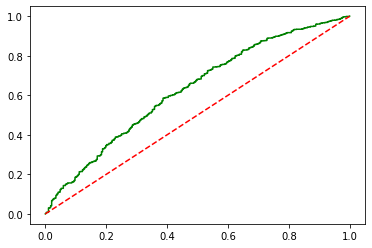

ROC-AUC Score: 0.6279615843970081


In [ ]:
worker.classification_report()
worker.model_stats(graph=True)

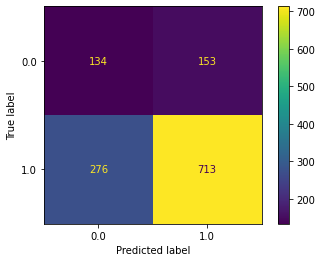

In [ ]:
plot_confusion_matrix(worker.cur_model, worker.X_test, worker.y_test, values_format='d')